<a href="https://colab.research.google.com/github/jaewoong-87/deep_learning/blob/main/structure_of_neutral_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

and gate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
def AND(a,b):
  input = np.array([a,b])
  weights = np.array([0.4,0.4])
  bias = -0.6
  value = np.sum(input*weights) + bias

  if value <=0:
    return 0
  else:
    return 1

In [5]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


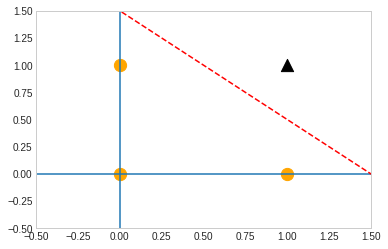

In [14]:
x1=np.arange(-2,2,0.01)
x2=np.arange(-2,2,0.01)
bias = -0.6

y= (-0.4 * x1 - bias) / 0.4

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1, y,'r--')
plt.scatter(0,0, color='orange', marker='o', s=150)
plt.scatter(0,1, color='orange', marker='o', s=150)
plt.scatter(1,0, color='orange', marker='o', s=150)
plt.scatter(1,1, color='black', marker='^', s=150)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()


OR

In [9]:
def OR(a,b):
  input = np.array([a,b])
  weights = np.array([0.4,0.5])
  bias = -0.3
  value = np.sum(input*weights) + bias

  if value <=0:
    return 0
  else:
    return 1


In [10]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


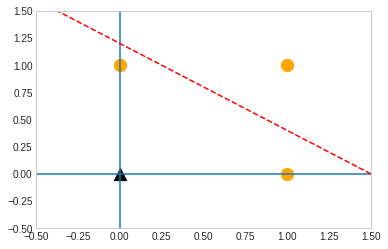

In [13]:
x1=np.arange(-2,2,0.01)
x2=np.arange(-2,2,0.01)
bias = -0.6

y= (-0.4 * x1 - bias) / 0.5

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1, y,'r--')
plt.scatter(0,0, color='black', marker='^', s=150)
plt.scatter(0,1, color='orange', marker='o', s=150)
plt.scatter(1,0, color='orange', marker='o', s=150)
plt.scatter(1,1, color='orange', marker='o', s=150)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

activation function

step f

In [15]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [16]:
def step_function_for_numpy(x):
  y = x > 0
  return y.astype(np.int)

In [17]:
print(step_function(-3))
print(step_function(-5))

a = np.array([5,3,-4,2.0])
print(step_function_for_numpy(a))

0
0
[1 1 0 1]


sigmoid f

In [18]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [19]:
print(sigmoid(3))
print(sigmoid(-3))

0.9525741268224334
0.04742587317756678


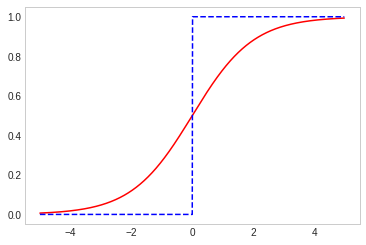

In [20]:
plt.grid()
x = np.arange(-5.0,5.0,0.01)
y1 = sigmoid(x)
y2 = step_function_for_numpy(x)
plt.plot(x, y1, 'r-', x,y2, 'b--')
plt.show()

ReLU(Rectified Linear Unit)

In [21]:
def ReLU(x):
  if x > 0:
    return x
  else:
    return 0

In [22]:
print(ReLU(5))
print(ReLU(-3))

5
0


Hyperbolic tangent f

In [25]:
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [26]:
print(tanh(3))
print(tanh(-3))

0.9950547536867306
-0.9950547536867306


identity f

In [28]:
def identify_f(x):
  return x

In [29]:
print(identify_f(5))
print(identify_f(-5))

5
-5


softmax used for  multiclass classfication

In [30]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [31]:
a = np.array([0.3, 0.2, 4.0, -1.2])
print(softmax(a))
print(np.sum(softmax(a)))

[0.02348781 0.02125265 0.9500187  0.00524084]
1.0


there are overflow problem. 

if input file is large, it could be limitless

non linear fucntion is important to deepen neutral network
if activation function has linear function, hidden layer doesn't have meaning.

In [32]:
def LeakyReLU(x):
  a = 0.01
  return np.maximum(a*x, x)


In [33]:
x = np.array([0.5, -1.4, 3, 0,5])
print(LeakyReLU(x))

[ 0.5   -0.014  3.     0.     5.   ]


ELU(Exponential Linear Units

In [36]:
def ELU(x):
  alpha= 1.0
  return (x >=0)* x + (x<0)* alpha * (np.exp(x) - 1)

In [37]:
print(ELU(4))
print(ELU(-0.5))
x= np.array([-0.2,0.1,4])
print(ELU(x))

4.0
-0.3934693402873666
[-0.18126925  0.1         4.        ]


layer

In [38]:
X = np.array([1.0,0.5,0.4])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6],[0.3,0.5,0.7]])
B1 = np.array([1,1,1])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1)+ B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

(3, 3)
(3,)
(3,)
[1.32 1.7  2.08]
[0.78918171 0.84553473 0.88894403]


In [39]:
def network():

   network={}

   network['W1']=np.array([[0.5,0.3,0.6],[0.2,0.7,0.7],[0.3,0.5,0.7]])
   network['B1']=np.array([1,1,1])

   network['W2']=np.array([[0.1,0.3,0.5],[0.2,0.2,0.6],[0.3,0.5,0.1]])
   network['B2']=np.array([1,1,1])

   network['W3']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.3],[0.5,0.5,0.5]])
   network['B3']=np.array([1,1,1])

   network['W4']=np.array([[0.1,0.3,0.5],[0.1,0.4,0.6],[0.3,0.5,0.7]])
   network['B4']=np.array([1,1,1])

   return network




In [40]:
def forward(network, x):
  W1, W2, W3, W4 = network['W1'],network['W2'],network['W3'],network['W4']
  B1, B2, B3, B4 = network['B1'],network['B2'],network['B3'],network['B4']

  A1 = np.dot(x, W1) + B1
  Z1 = sigmoid(A1)

  A2 = np.dot(Z1, W2) + B2
  Z2 = sigmoid(A2)

  A3 = np.dot(Z2, W3) + B3
  Z1 = sigmoid(A3)

  A4 = np.dot(x, W4) + B4
  y = sigmoid(A4)

  return y

In [41]:
net = network()
x=np.array([0.3,1.3,-0.2])
y=forward(net, x)
print(y)

[0.75026011 0.81906121 0.85692728]
